In [550]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import warnings
import sklearn
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from google.colab import files
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV


pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

warnings.filterwarnings('ignore')
%matplotlib inline

In [501]:
uploaded = files.upload()

Saving train.csv to train (12).csv


In [502]:
# Reading the dataset
house = pd.read_csv("train.csv", na_values="NAN")

In [503]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [504]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [505]:
!pip install sweetviz

In [506]:
#Automatic analysis of data
import sweetviz as sv
sweet_report = sv.analyze(house,pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

In [507]:
#get description of dataframe
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [508]:
#check if any null column exist or not
nunique = house.nunique()
nunique[nunique==0]

Series([], dtype: int64)

In [509]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


### Places Where NaN Means Something


In [510]:
#Features on the description data file provided
null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [511]:
for i in null_has_meaning:
    house[i].fillna("None", inplace=True)

###Imputing "Real" NaN Values
These are the real NaN values that we have to deal with accordingly because they were not recorded.

In [512]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000


LotFrontage has too many Null values and it is a numerical value so it may be better to just drop it.

In [513]:
house.drop("LotFrontage", axis=1, inplace=True)

In [514]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000


GarageYrBlt, MasVnrArea, and MasVnrType all have a fairly decent amount of missing values. MasVnrType is categorical so we can replace the missing values with "None". We can fill the others with median.

In [515]:
house["GarageYrBlt"].fillna(house["GarageYrBlt"].median(), inplace=True)
house["MasVnrArea"].fillna(house["MasVnrArea"].median(), inplace=True)
house["MasVnrType"].fillna("None", inplace=True)

In [516]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Electrical,1,0.000685
MSSubClass,0,0.000000
GarageYrBlt,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000


Now that only one row has a null entry, we will drop the row.

In [517]:
house.dropna(inplace=True)

In [518]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Id,0,0.0
MSSubClass,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0


In [519]:
sweet_report = sv.analyze(house,pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

### Now we will determine the data type of all features remaining

In [520]:
types_train = house.dtypes #type of each feature in data: int, float, object
num_train = types_train[(types_train == 'int64') | (types_train == float)] #numerical values are either type int or float
cat_train = types_train[types_train == object] #categorical values are type object

In [521]:
pd.DataFrame(types_train).reset_index().set_index(0).reset_index()[0].value_counts()

object     43
int64      35
float64     2
Name: 0, dtype: int64

In [522]:
#we should convert num_train to a list to make it easier to work with
numerical_values_train = list(num_train.index)

In [523]:
print(numerical_values_train)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [524]:
categorical_values_train = list(cat_train.index)
print(categorical_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [525]:
dummy_columns = pd.get_dummies(house[categorical_values_train],drop_first=True)


In [526]:
dummy_columns.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0

In [527]:
house = house.drop(columns= categorical_values_train)

In [528]:
house['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1459, dtype: int64

In [529]:
house = pd.concat([house,dummy_columns],axis=1)

In [531]:
house['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1459, dtype: int64

In [532]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 260 entries, Id to SaleCondition_Partial
dtypes: float64(2), int64(35), uint8(223)
memory usage: 750.9 KB


### Prepairing Data For Modeling

In [533]:
df_train,df_test = train_test_split(house,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 260)
(438, 260)


In [534]:
X=house.drop(["SalePrice"], axis=1).copy()
X.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleConditio

In [535]:
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [536]:
print(X_train.shape)

print(y_train.shape)

(1021, 259)
(1021,)


In [539]:
y_test = df_test.pop('SalePrice')
X_test = df_test
## Create a scaling instance
scaler = StandardScaler()

## Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)


## Scale the numerical columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [540]:
X_train[num_cols].head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
984,0.596033,0.787494,-0.049244,-0.790233,-0.512364,0.195445,-0.352223,-0.555867,-0.931228,-0.299629,-1.265589,-2.274081,0.320038,0.206085,-0.123208,0.399579,-0.826986,-0.241465,0.789648,-0.755902,1.399721,4.407570,0.917605,-0.963636,-0.058581,0.302190,0.302095,-0.729730,-0.702191,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,0.633710,0.890540
1416,1.619842,3.177599,0.067048,-1.500469,0.384932,-2.818107,-1.638960,-0.555867,-0.931228,-0.299629,0.464070,-0.607802,0.179679,1.610886,-0.123208,1.449374,-0.826986,-0.241465,0.789648,-0.755902,1.399721,4.407570,2.780178,-0.963636,-0.306419,0.302190,0.399400,-0.729730,-0.702191,1.435413,-0.121132,-0.273,-0.054189,-0.077724,-0.830960,1.638888
390,-0.811704,-0.168548,-0.213872,-0.790233,2.179524,-2.326767,-1.638960,-0.555867,-0.422211,1.997881,-0.755819,-0.427663,-0.534650,0.146404,-0.123208,-0.293361,1.087646,-0.241465,-1.022106,-0.755902,1.399721,-0.207947,0.296747,-0.963636,-0.017275,-1.027708,-0.416110,-0.729730,1.144341,1.403785,-0.121132,-0.273,-0.054189,-0.077724,-0.830960,0.142193
877,0.342451,0.070462,-0.172811,2.050710,-0.512364,1.079857,0.982172,0.591698,1.539931,-0.299629,-0.615576,0.861183,0.721065,0.963575,-0.123208,1.324758,1.087646,-0.241465,0.789648,1.269756,1.399721,-0.207947,2.159320,0.578484,1.056689,1.632089,1.224177,0.708584,-0.702191,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,-0.098625,0.890540
567,-0.392226,-0.885580,-0.044841,0.630239,-0.512364,1.079857,0.934515,0.336684,-0.927003,-0.299629,2.106912,0.979131,0.904033,-0.785539,-0.123208,0.023843,-0.826986,-0.241465,0.789648,-0.755902,0.180339,-0.207947,0.296747,-0.963636,1.056689,0.302190,0.269660,-0.729730,-0.702191,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,-1.197128,1.638888


In [541]:
house.isnull().sum().sum()

0

In [568]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=20)
rfe = rfe.fit(X_train,y_train)

X_train = sm.add_constant(X_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('const', False, 239),
 ('Id', False, 197),
 ('MSSubClass', False, 168),
 ('LotArea', False, 104),
 ('OverallQual', False, 67),
 ('OverallCond', False, 109),
 ('YearBuilt', False, 227),
 ('YearRemodAdd', False, 120),
 ('MasVnrArea', False, 113),
 ('BsmtFinSF1', False, 46),
 ('BsmtFinSF2', False, 48),
 ('BsmtUnfSF', False, 49),
 ('TotalBsmtSF', False, 42),
 ('1stFlrSF', False, 10),
 ('2ndFlrSF', False, 19),
 ('LowQualFinSF', False, 50),
 ('GrLivArea', False, 45),
 ('BsmtFullBath', False, 213),
 ('BsmtHalfBath', False, 217),
 ('FullBath', False, 161),
 ('HalfBath', False, 230),
 ('BedroomAbvGr', False, 125),
 ('KitchenAbvGr', False, 118),
 ('TotRmsAbvGrd', False, 218),
 ('Fireplaces', False, 192),
 ('GarageYrBlt', False, 209),
 ('GarageCars', False, 117),
 ('GarageArea', False, 90),
 ('WoodDeckSF', False, 187),
 ('OpenPorchSF', False, 237),
 ('EnclosedPorch', False, 211),
 ('3SsnPorch', False, 220),
 ('ScreenPorch', False, 190),
 ('PoolArea', True, 1),
 ('MiscVal', False, 133),
 ('MoSol

In [569]:
col = X_train.columns[rfe.support_]
col

Index(['PoolArea', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Condition2_PosA', 'Condition2_PosN', 'HouseStyle_2.5Fin', 'RoofMatl_Membran', 'RoofMatl_WdShngl', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Po', 'BsmtExposure_Gd', 'BsmtFinType2_None', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'PoolQC_Gd', 'PoolQC_None', 'SaleType_Con'], dtype='object')

In [566]:
lm = sm.OLS(y_train,X_train).fit()  #Running the linear Model

In [567]:
#Get the Summary of Linear Model
np.seterr(invalid='ignore')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     52.11
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:20:07   Log-Likelihood:                -11552.
No. Observations:                1021   AIC:                         2.358e+04
Df Residuals:                     782   BIC:                         2.476e+04
Df Model:                         238                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -2.34e+06   3.88e+05     -6.028      0.000    -3.1e+06   -1.58e+06
Id                      915.4031    806.326      1.135      0.257    -667.416    2498.223
MSSubClass            -1935.0764   4833.403     -0.400      0.689   -1.14e+04    7552.905
LotArea                6943.0027   1367.379      5.078      0.000    4258.835    9627.171
OverallQual            8281.9865   1790.916      4.624      0.000    4766.414    1.18e+04
OverallCond            5927.5703   1189.000      4.985      0.000    3593.560    8261.581
YearBuilt              8723.5771   2990.508      2.917      0.004    2853.202    1.46e+04
YearRemodAdd           2728.2273   1464.936      1.862      0.063    -147.445    5603.899
MasVnrArea             5059.5994   1273.952      3.972      0.000    2558.829    7560.369
BsmtFinSF1             8521.2182   1366.205      6.237      0.000    5839.354    1.12e+04
BsmtFinSF2             1799.2951   1557.787      1.155      0.248   -1258.645    4857.235
BsmtUnfSF              -336.1335   1185.381     -0.284      0.777   -2663.039    1990.772
TotalBsmtSF            8984.7983   1908.808      4.707      0.000    5237.803    1.27e+04
1stFlrSF               6001.8080   2024.223      2.965      0.003    2028.254    9975.362
2ndFlrSF               1.495e+04   2211.338      6.761      0.000    1.06e+04    1.93e+04
LowQualFinSF            -44.5330   1174.951     -0.038      0.970   -2350.965    2261.899
GrLivArea              1.682e+04   1609.406     10.448      0.000    1.37e+04       2e+04
BsmtFullBath           1299.6369   1303.321      0.997      0.319   -1258.784    3858.058
BsmtHalfBath            318.5515    914.314      0.348      0.728   -1476.249    2113.352
FullBath               1705.8846   1536.435      1.110      0.267   -1310.140    4721.909
HalfBath              -1003.4495   1355.658     -0.740      0.459   -3664.609    1657.710
BedroomAbvGr          -3657.4744   1402.831     -2.607      0.009   -6411.235    -903.714
KitchenAbvGr          -4405.2704   1606.036     -2.743      0.006   -7557.922   -1252.619
TotRmsAbvGrd           3223.1566   1946.554      1.656      0.098    -597.934    7044.247
Fireplaces             2567.2194   2017.329      1.273      0.204   -1392.802    6527.241
GarageYrBlt           -2149.3208   1833.604     -1.172      0.241   -5748.689    1450.048
GarageCars             3632.5612   2188.722      1.660      0.097    -663.904    7929.027
GarageArea             4813.9084   2234.119      2.155      0.031     428.328    9199.489
WoodDeckSF             1342.3918    917.013      1.464      0.144    -457.706    3142.489
OpenPorchSF             516.0524    977.272      0.528      0.598   -1402.336    2434.440
EnclosedPorch          1282.8759    976.130      1.314      0.189    -633.269    3199.020
3SsnPorch              

In [551]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low,
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [552]:
print(model_cv.best_params_)

{'alpha': 50}


In [562]:
alpha = 50
ridge = Ridge(alpha=alpha)
# Fit the model on Training data
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.00000000e+00 -2.97865048e+02 -6.01708504e+03  3.37852928e+03
  1.66519036e+04  6.04462906e+03  5.31217646e+03  2.32828004e+03
  6.34485818e+03  2.01194615e+03  6.18253994e+02  1.33388726e+03
  3.55345915e+03  5.58564169e+03  1.03816553e+04 -9.26314676e+02
  1.26643492e+04  5.29095238e+03  8.42378322e+02  5.40032638e+03
  2.10490977e+03 -3.38711334e+03 -3.79432895e+03  4.78703674e+03
  3.75998790e+03 -5.25881660e+02  9.18863831e+03  8.25099833e+02
  2.49293891e+03 -5.52474520e+02  8.95775276e+02  9.70241545e+02
  1.52213951e+03 -2.01347584e+03 -3.04613038e+01 -6.70548874e+02
 -1.09391191e+03  3.12622862e+03  3.55006077e+02  3.03521555e+03
 -3.47015181e+03  2.42362933e+03  1.73269974e+03 -3.65003798e+02
  1.26624707e+03 -5.40165610e+03 -8.56237201e+02  4.82717875e+03
  2.64943878e+03  5.58831140e+03 -8.18453732e+02  4.65348759e+03
 -1.97599793e+03 -7.33952045e+02 -1.02083577e+03  1.43673913e+03
 -5.72421618e+02 -1.55200135e+02 -6.10997974e+02  2.16076768e+03
  2.06493994e+03 -3.62369

In [563]:
## Create a dataframe of ridge cross validation results
model_cv_results= pd.DataFrame(model_cv.cv_results_)
model_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018194,0.008068,0.004780,0.000185,0.0001,{'alpha': 0.0001},-18121.533371,-22459.875917,-19971.603689,-19231.897267,-19040.367863,-19765.055621,1470.735469,10,-12521.513623,-11330.407268,-11505.303249,-12344.183955,-11801.521038,-11900.585827,463.356529
1,0.022922,0.006568,0.007783,0.002539,0.001,{'alpha': 0.001},-18126.642880,-22442.036900,-20197.973527,-19792.446184,-19176.899142,-19947.199727,1429.604064,12,-12522.827075,-11330.846987,-11617.502329,-12455.227739,-11898.749999,-11965.030826,464.497151
2,0.019001,0.006715,0.005839,0.001987,0.01,{'alpha': 0.01},-18170.226564,-22300.241664,-20491.630634,-20694.393233,-19447.398054,-20220.778030,1372.932584,22,-12541.953404,-11343.094441,-11884.111252,-12738.954762,-12176.045826,-12136.831937,494.388508
3,0.014523,0.001382,0.004632,0.000047,0.05,{'alpha': 0.05},-18327.014690,-21910.840546,-20350.865451,-20776.684253,-19389.559385,-20150.992865,1219.440852,18,-12672.769851,-11459.945708,-12000.269996,-12860.524050,-12415.136490,-12281.729219,502.048039
4,0.016173,0.003950,0.004811,0.000146,0.1,{'alpha': 0.1},-18466.990906,-21690.196166,-20156.074127,-20666.152702,-19555.700085,-20107.022797,1078.436974,15,-12823.081949,-11679.871910,-12141.062063,-12916.870650,-12641.259211,-12440.429156,465.149513
5,0.021385,0.006795,0.007628,0.002411,0.2,{'alpha': 0.2},-18654.847566,-21489.123732,-19934.009992,-20516.634539,-19907.595126,-20100.442191,922.636004,14,-13089.041864,-12128.725930,-12425.743900,-12987.511221,-13017.676908,-12729.739964,382.644231
6,0.014080,0.000225,0.005505,0.001684,0.3,{'alpha': 0.3},-18759.124050,-21402.385874,-19874.265319,-20443.344673,-20254.499866,-20146.723956,857.432628,17,-13309.363693,-12512.283966,-12671.568133,-13038.423908,-13338.385267,-12974.004993,332.879137
7,0.023269,0.007667,0.006505,0.003566,0.4,{'alpha': 0.4},-18831.303642,-21315.873207,-19842.752888,-20414.459182,-20501.178228,-20181.113429,822.319377,19,-13484.558061,-12819.091147,-12890.996036,-13081.352235,-13605.149368,-13176.229369,315.260648
8,0.022858,0.007295,0.007638,0.002258,0.5,{'alpha': 0.5},-18880.150688,-21239.814851,-19816.123411,-20399.947244,-20677.815179,-20202.770274,804.838647,20,-13623.184184,-13075.992554,-13081.539880,-13122.187336,-13822.041514,-13344.989094,315.079917
9,0.026402,0.003811,0.009521,0.000190,0.6,{'alpha': 0.6},-18927.913322,-21173.633977,-19789.703745,-20383.669218,-20808.316915,-20216.647435,792.074342,21,-13740.194585,-13285.540092,-13241.450829,-13157.483380,-14001.482783,-13485.230334,328.099395


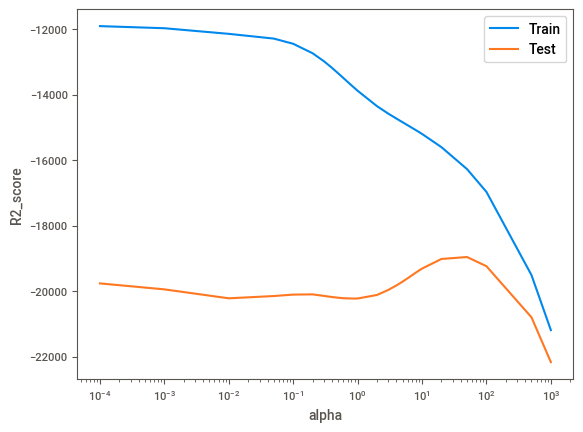

In [564]:
plt.plot(model_cv_results['param_alpha'], model_cv_results['mean_train_score'], label='Train')
plt.plot(model_cv_results['param_alpha'], model_cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

##Lasso Regression

In [556]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = 5,
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)
lassoCV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [557]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 100}

In [558]:
lassoCV.cv_results_

{'mean_fit_time': array([0.40332246, 0.41453247, 0.4021009 , 0.28327832, 0.29962015,
        0.25731964, 0.24567394, 0.24392843, 0.24738965, 0.24541774,
        0.29648657, 0.36464052, 0.42320809, 0.39173179, 0.33621359,
        0.41127338, 0.51657553, 0.29572449, 0.21314254, 0.38206   ,
        0.31315088, 0.34455066, 0.29980884, 0.3103869 , 0.30537024,
        0.13428769, 0.04982562, 0.03436728]),
 'std_fit_time': array([0.07870687, 0.04636506, 0.06594037, 0.03788662, 0.03657739,
        0.01955965, 0.02204581, 0.00408455, 0.01463077, 0.00537933,
        0.03281559, 0.0385488 , 0.02611807, 0.06194366, 0.07721948,
        0.09025281, 0.13470154, 0.09069049, 0.05337985, 0.19361715,
        0.15400229, 0.17816907, 0.18228583, 0.10112876, 0.10766384,
        0.01552289, 0.01049864, 0.01091994]),
 'mean_score_time': array([0.00916381, 0.01370111, 0.00741   , 0.00660281, 0.00696983,
        0.00657616, 0.00648479, 0.00676417, 0.00667777, 0.00664783,
        0.00644865, 0.01232157, 0.008931

In [559]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [560]:
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.403322,0.078707,0.009164,0.003469,0.0001,{'alpha': 0.0001},-18225.604637,-21803.968912,-20173.357324,-19898.837509,-19335.539882,-19887.461653,1168.011319,27,-12514.067132,-11323.821955,-11746.935679,-12485.461923,-12008.618191,-12015.780976,451.669275
1,0.414532,0.046365,0.013701,0.004602,0.001,{'alpha': 0.001},-18225.273823,-21802.813728,-20174.036525,-19897.847484,-19335.081901,-19887.010692,1167.801126,26,-12514.061593,-11323.807368,-11746.944252,-12485.488298,-12008.637100,-12015.787722,451.676928
2,0.402101,0.065940,0.007410,0.001527,0.01,{'alpha': 0.01},-18221.966171,-21791.264186,-20183.514759,-19887.946199,-19331.924776,-19883.323218,1165.720597,25,-12514.109028,-11323.680086,-11747.099042,-12485.864355,-12008.905600,-12015.931622,451.785350
3,0.283278,0.037887,0.006603,0.000333,0.05,{'alpha': 0.05},-18206.815791,-21741.363516,-20220.092710,-19868.484696,-19328.670132,-19873.085369,1156.178252,24,-12514.480992,-11323.282193,-11748.305558,-12488.072867,-12010.501027,-12016.928527,452.300850
4,0.299620,0.036577,0.006970,0.001271,0.1,{'alpha': 0.1},-18187.917361,-21679.210626,-20257.253329,-19864.978366,-19322.151846,-19862.302305,1144.768691,23,-12514.750982,-11322.821637,-11749.749959,-12490.951881,-12012.497350,-12018.154362,452.925208
5,0.257320,0.019560,0.006576,0.000320,0.2,{'alpha': 0.2},-18150.092245,-21590.508681,-20269.528670,-19858.328394,-19305.722463,-19834.836091,1130.505978,22,-12514.965293,-11322.625488,-11752.777051,-12497.324712,-12017.030078,-12020.944524,453.998501
6,0.245674,0.022046,0.006485,0.000131,0.3,{'alpha': 0.3},-18113.971370,-21528.042847,-20249.395999,-19849.053314,-19290.010583,-19806.094823,1121.881552,21,-12515.617377,-11322.204996,-11756.416678,-12503.637526,-12021.412485,-12023.857812,455.162270
7,0.243928,0.004085,0.006764,0.000257,0.4,{'alpha': 0.4},-18078.314206,-21482.165787,-20228.548949,-19839.061636,-19274.616465,-19780.541409,1118.320025,20,-12516.286300,-11321.415039,-11760.023878,-12510.299193,-12025.865281,-12026.777938,456.531844
8,0.247390,0.014631,0.006678,0.000310,0.5,{'alpha': 0.5},-18042.610212,-21449.975759,-20207.578017,-19829.044294,-19256.007196,-19757.043096,1119.330512,19,-12516.809828,-11321.422580,-11763.691268,-12517.062237,-12030.761654,-12029.949513,457.649713
9,0.245418,0.005379,0.006648,0.000263,0.6,{'alpha': 0.6},-18024.744499,-21417.464647,-20186.318711,-19820.168886,-19235.528483,-19736.845045,1114.994014,18,-12518.157337,-11321.532821,-11767.777228,-12523.448544,-12036.072334,-12033.397653,458.792923


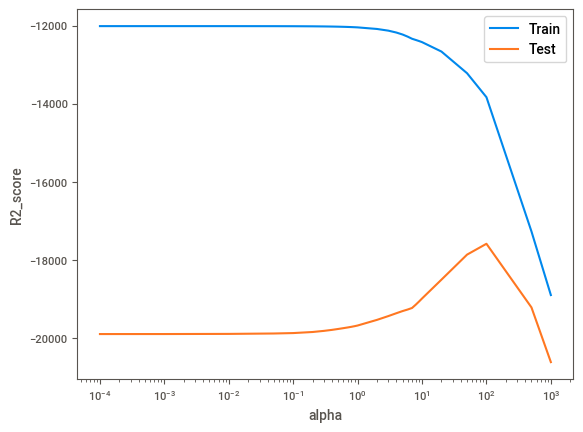

In [561]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()